# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

19:08:41 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=70091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=945814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=961491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=356028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=751842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=699728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

19:08:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=407583;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=850244;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

19:08:43 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=513761;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=940316;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

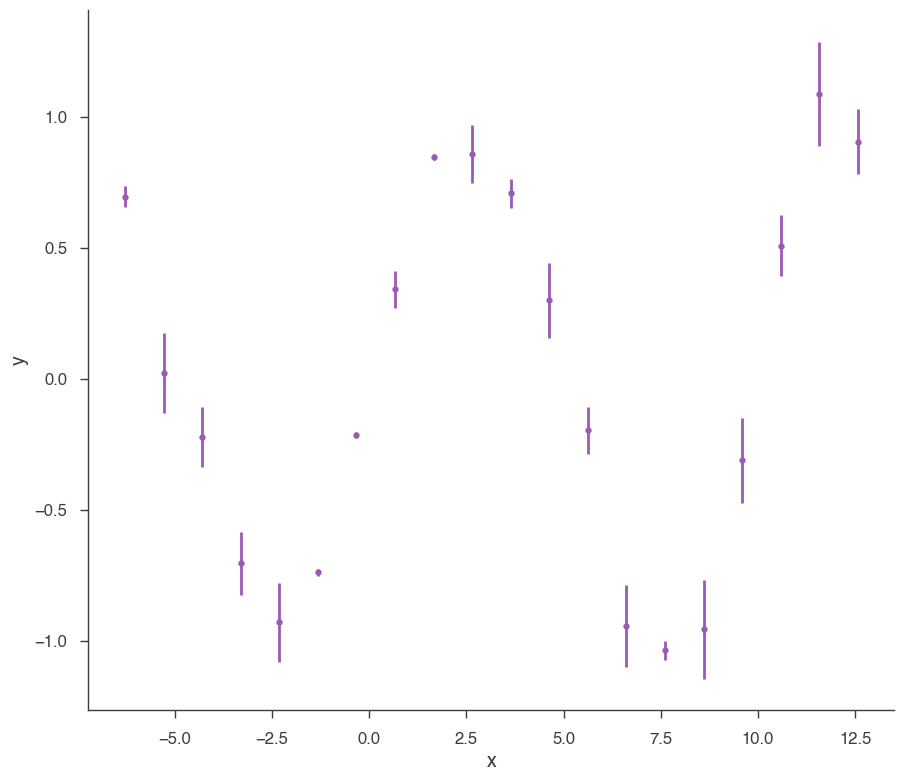

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=199626;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=97459;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19:08:46 INFO      Mean acceptance fraction: 0.7192                                            ]8;id=341851;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=747992;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=219103;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=563272;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=475292;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=509347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 -0.10 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.990228
total,-10.990228


Values of statistical measures:

,statistical measures
AIC,26.686337
BIC,27.971920
DIC,25.980243
PDIC,1.997140


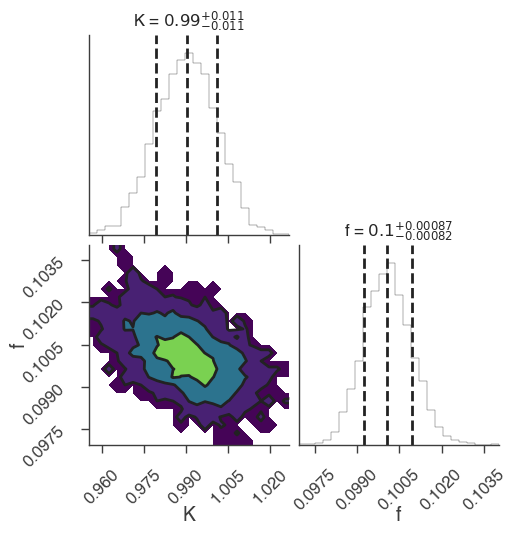

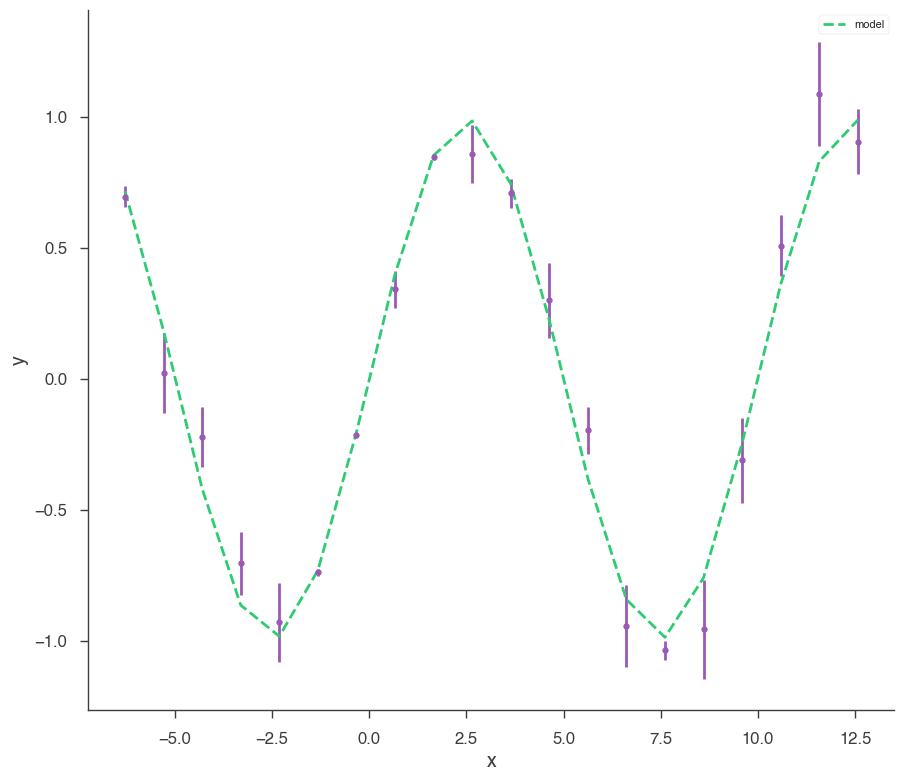

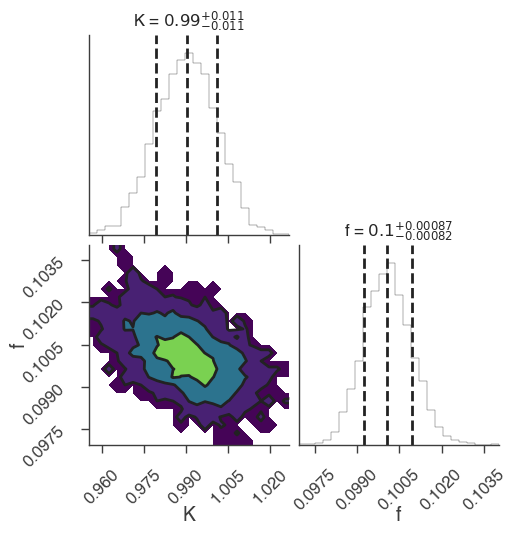

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

19:08:47 INFO      sampler set to multinest                                                ]8;id=150759;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=128382;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.167158870633720      +/-  0.14232134452636366     
 Total Likelihood Evaluations:         5663
 Sampling finished. Exiting MultiNest



19:08:48 INFO      fit restored to maximum of posterior                                         ]8;id=923970;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=885764;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=735709;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=111093;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 -0.008 +0.009) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.99035
total,-10.99035


Values of statistical measures:

,statistical measures
AIC,26.686582
BIC,27.972165
DIC,26.248887
PDIC,2.133174
log(Z),-8.758486


         INFO      deleting the chain directory chains                                     ]8;id=550624;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=149937;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

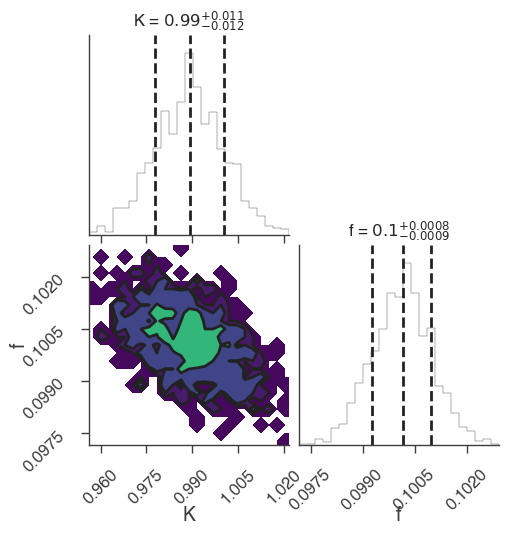

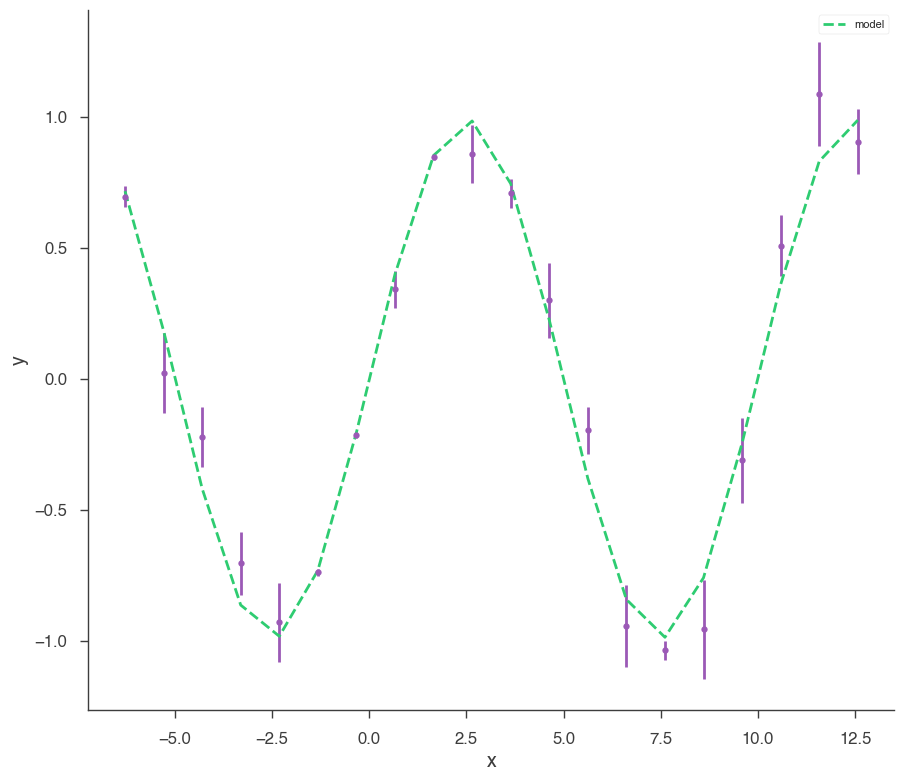

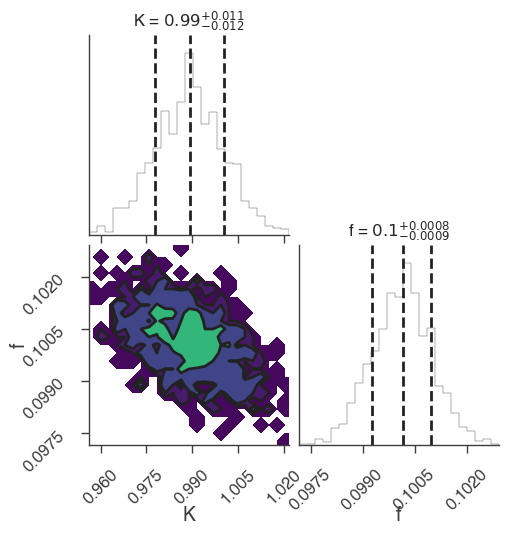

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

19:08:49 INFO      sampler set to dynesty_nested                                           ]8;id=484614;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=445514;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

257it [00:00, 2562.39it/s, bound: 0 | nc: 5 | ncall: 739 | eff(%): 34.777 | loglstar:   -inf < -5132.859 <    inf | logz: -5140.173 +/-  0.135 | dlogz: 5111.476 >  0.409]

514it [00:00, 2011.27it/s, bound: 0 | nc: 3 | ncall: 1400 | eff(%): 36.714 | loglstar:   -inf < -2299.518 <    inf | logz: -2307.486 +/-  0.141 | dlogz: 2300.523 >  0.409]

723it [00:00, 1637.96it/s, bound: 0 | nc: 13 | ncall: 2302 | eff(%): 31.407 | loglstar:   -inf < -1788.217 <    inf | logz: -1796.554 +/-  0.140 | dlogz: 1778.430 >  0.409]

896it [00:00, 1452.94it/s, bound: 0 | nc: 5 | ncall: 3438 | eff(%): 26.062 | loglstar:   -inf < -1432.234 <    inf | logz: -1440.645 +/-  0.138 | dlogz: 1421.208 >  0.409] 

1047it [00:00, 1162.85it/s, bound: 0 | nc: 10 | ncall: 5043 | eff(%): 20.761 | loglstar:   -inf < -996.037 <    inf | logz: -1004.878 +/-  0.144 | dlogz: 985.668 >  0.409]

1172it [00:00, 888.71it/s, bound: 0 | nc: 20 | ncall: 7106 | eff(%): 16.493 | loglstar:   -inf < -719.425 <    inf | logz: -728.913 +/-  0.151 | dlogz: 714.147 >  0.409]  

1272it [00:01, 704.04it/s, bound: 0 | nc: 3 | ncall: 9102 | eff(%): 13.975 | loglstar:   -inf < -560.887 <    inf | logz: -570.398 +/-  0.147 | dlogz: 557.140 >  0.409] 

1353it [00:01, 592.63it/s, bound: 0 | nc: 54 | ncall: 10927 | eff(%): 12.382 | loglstar:   -inf < -443.560 <    inf | logz: -452.149 +/-  0.142 | dlogz: 437.810 >  0.409]

1420it [00:01, 501.48it/s, bound: 0 | nc: 33 | ncall: 13117 | eff(%): 10.826 | loglstar:   -inf < -372.967 <    inf | logz: -382.412 +/-  0.146 | dlogz: 368.266 >  0.409]

1476it [00:01, 407.15it/s, bound: 1 | nc: 1 | ncall: 14568 | eff(%): 10.132 | loglstar:   -inf < -327.622 <    inf | logz: -336.171 +/-  0.140 | dlogz: 321.337 >  0.409] 

1677it [00:02, 670.75it/s, bound: 1 | nc: 1 | ncall: 14900 | eff(%): 11.255 | loglstar:   -inf < -207.854 <    inf | logz: -217.452 +/-  0.148 | dlogz: 202.641 >  0.409]

1800it [00:02, 675.31it/s, bound: 2 | nc: 2 | ncall: 15147 | eff(%): 11.884 | loglstar:   -inf < -159.341 <    inf | logz: -169.279 +/-  0.147 | dlogz: 154.121 >  0.409]

2019it [00:02, 964.50it/s, bound: 2 | nc: 4 | ncall: 15475 | eff(%): 13.047 | loglstar:   -inf < -93.494 <    inf | logz: -103.185 +/-  0.145 | dlogz: 87.190 >  0.409]  

2145it [00:02, 877.26it/s, bound: 3 | nc: 2 | ncall: 15756 | eff(%): 13.614 | loglstar:   -inf < -70.322 <    inf | logz: -79.808 +/-  0.146 | dlogz: 63.427 >  0.409] 

2368it [00:02, 1156.66it/s, bound: 3 | nc: 2 | ncall: 16097 | eff(%): 14.711 | loglstar:   -inf < -44.900 <    inf | logz: -54.550 +/-  0.145 | dlogz: 37.547 >  0.409]

2512it [00:02, 1033.95it/s, bound: 4 | nc: 1 | ncall: 16393 | eff(%): 15.324 | loglstar:   -inf < -32.868 <    inf | logz: -42.189 +/-  0.146 | dlogz: 24.964 >  0.409]

2733it [00:02, 1288.35it/s, bound: 4 | nc: 4 | ncall: 16728 | eff(%): 16.338 | loglstar:   -inf < -24.037 <    inf | logz: -33.199 +/-  0.143 | dlogz: 15.394 >  0.409]

2887it [00:03, 1146.40it/s, bound: 5 | nc: 1 | ncall: 17018 | eff(%): 16.964 | loglstar:   -inf < -19.813 <    inf | logz: -29.162 +/-  0.144 | dlogz: 10.968 >  0.409]

3107it [00:03, 1380.38it/s, bound: 5 | nc: 1 | ncall: 17370 | eff(%): 17.887 | loglstar:   -inf < -16.226 <    inf | logz: -25.724 +/-  0.145 | dlogz:  6.975 >  0.409]

3267it [00:03, 1240.06it/s, bound: 6 | nc: 1 | ncall: 17637 | eff(%): 18.524 | loglstar:   -inf < -14.389 <    inf | logz: -23.859 +/-  0.145 | dlogz:  4.713 >  0.409]

3468it [00:03, 1416.68it/s, bound: 6 | nc: 1 | ncall: 17997 | eff(%): 19.270 | loglstar:   -inf < -13.027 <    inf | logz: -22.456 +/-  0.145 | dlogz:  2.859 >  0.409]

3627it [00:03, 1242.69it/s, bound: 7 | nc: 2 | ncall: 18263 | eff(%): 19.860 | loglstar:   -inf < -12.364 <    inf | logz: -21.766 +/-  0.145 | dlogz:  1.877 >  0.409]

3829it [00:03, 1421.34it/s, bound: 7 | nc: 1 | ncall: 18624 | eff(%): 20.559 | loglstar:   -inf < -11.834 <    inf | logz: -21.215 +/-  0.145 | dlogz:  1.074 >  0.409]

3987it [00:03, 1191.06it/s, bound: 8 | nc: 2 | ncall: 18896 | eff(%): 21.100 | loglstar:   -inf < -11.560 <    inf | logz: -20.942 +/-  0.145 | dlogz:  0.688 >  0.409]

4171it [00:03, 1336.51it/s, +3 | bound: 8 | nc: 1 | ncall: 19234 | eff(%): 21.705 | loglstar:   -inf < -11.330 <    inf | logz: -20.729 +/-  0.145 | dlogz:  0.405 >  0.409]

4171it [00:04, 1038.68it/s, +400 | bound: 8 | nc: 1 | ncall: 19631 | eff(%): 23.769 | loglstar:   -inf < -11.001 <    inf | logz: -20.375 +/-  0.144 | dlogz:  0.001 >  0.409]

19:08:53 INFO      fit restored to maximum of posterior                                         ]8;id=981861;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=762690;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=138137;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=71112;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 +/- 0.10) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 -0.008 +0.009) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.99023
total,-10.99023


Values of statistical measures:

,statistical measures
AIC,26.686343
BIC,27.971925
DIC,25.898278
PDIC,1.958902
log(Z),-8.848954


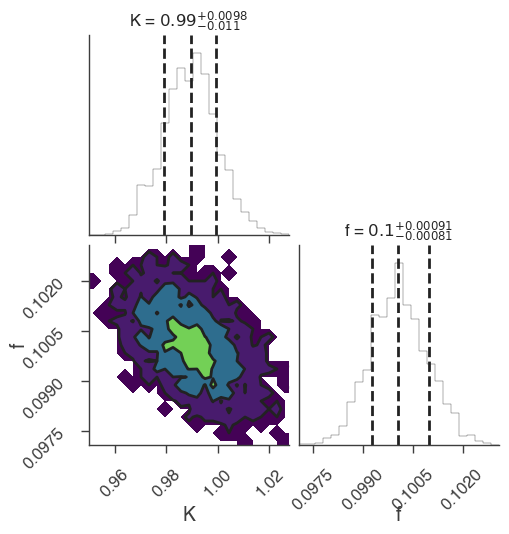

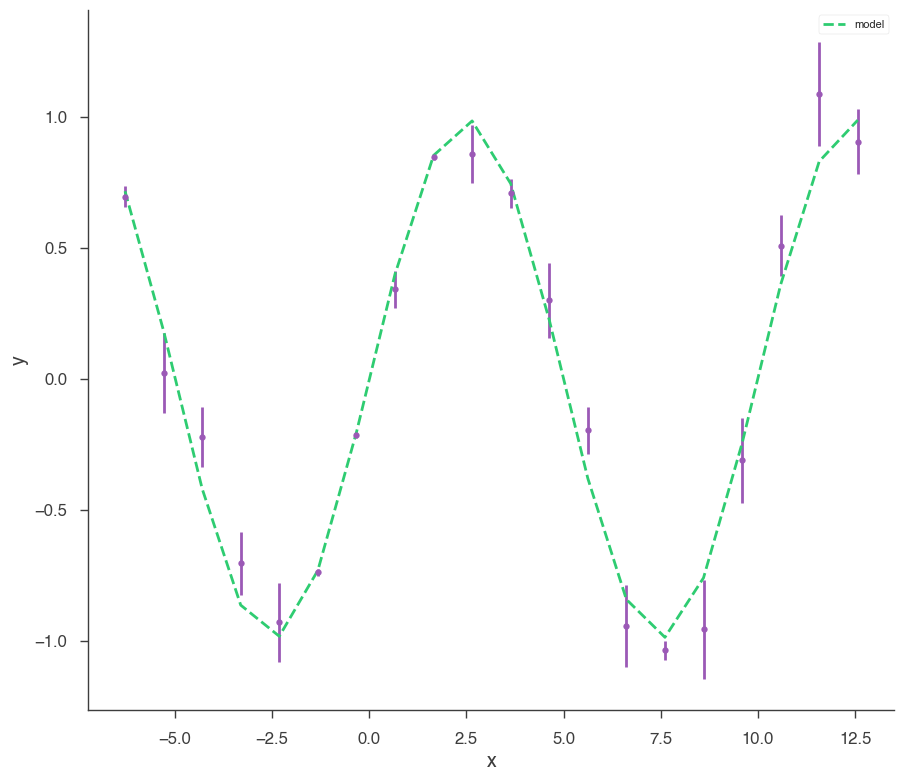

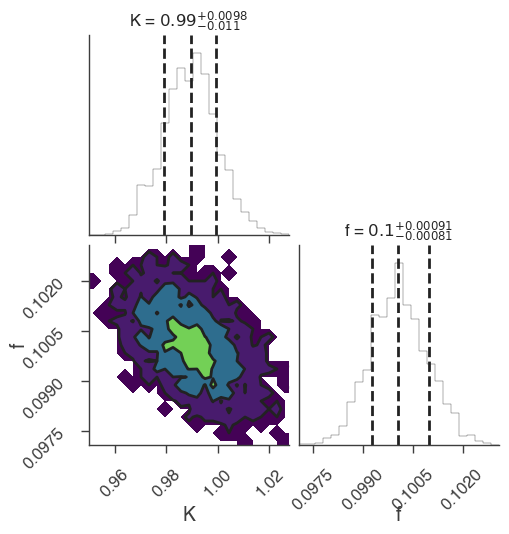

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

19:08:54 INFO      sampler set to dynesty_dynamic                                          ]8;id=411509;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=158781;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

121it [00:00, 1209.78it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 132 | eff(%): 19.146 | loglstar:   -inf < -13813.535 <    inf | logz: -13820.684 +/-  0.120 | dlogz: 13915.018 >  0.010]

347it [00:00, 1826.82it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 469 | eff(%): 35.810 | loglstar:   -inf < -5193.122 <    inf | logz: -5200.688 +/-  0.122 | dlogz: 5182.899 >  0.010]   

530it [00:00, 1742.93it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 887 | eff(%): 38.212 | loglstar:   -inf < -2894.748 <    inf | logz: -2901.814 +/-  0.117 | dlogz: 2880.816 >  0.010]

705it [00:00, 1570.90it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1454 | eff(%): 36.080 | loglstar:   -inf < -2083.310 <    inf | logz: -2090.981 +/-  0.118 | dlogz: 2069.690 >  0.010]

865it [00:00, 1467.42it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 2151 | eff(%): 32.629 | loglstar:   -inf < -1806.132 <    inf | logz: -1813.941 +/-  0.118 | dlogz: 1796.428 >  0.010]

1014it [00:00, 1360.39it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 3001 | eff(%): 28.963 | loglstar:   -inf < -1607.162 <    inf | logz: -1614.894 +/-  0.119 | dlogz: 1596.863 >  0.010]

1152it [00:00, 1150.34it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 4236 | eff(%): 24.324 | loglstar:   -inf < -1263.313 <    inf | logz: -1272.512 +/-  0.135 | dlogz: 1258.758 >  0.010] 

1273it [00:01, 1009.14it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5551 | eff(%): 21.038 | loglstar:   -inf < -996.404 <    inf | logz: -1005.747 +/-  0.134 | dlogz: 989.394 >  0.010]  

1379it [00:01, 842.58it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 7187 | eff(%): 17.939 | loglstar:   -inf < -778.595 <    inf | logz: -788.258 +/-  0.139 | dlogz: 781.513 >  0.010] 

1470it [00:01, 723.24it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 8760 | eff(%): 15.875 | loglstar:   -inf < -667.840 <    inf | logz: -676.733 +/-  0.129 | dlogz: 663.146 >  0.010] 

1548it [00:01, 608.42it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 10445 | eff(%): 14.143 | loglstar:   -inf < -577.430 <    inf | logz: -586.348 +/-  0.130 | dlogz: 572.475 >  0.010]

1614it [00:01, 502.95it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 12300 | eff(%): 12.609 | loglstar:   -inf < -509.345 <    inf | logz: -518.544 +/-  0.130 | dlogz: 504.648 >  0.010] 

1670it [00:01, 478.56it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 13659 | eff(%): 11.795 | loglstar:   -inf < -451.157 <    inf | logz: -460.547 +/-  0.134 | dlogz: 446.753 >  0.010]

1721it [00:02, 422.05it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 15349 | eff(%): 10.859 | loglstar:   -inf < -402.978 <    inf | logz: -411.746 +/-  0.131 | dlogz: 397.169 >  0.010]

1766it [00:02, 373.76it/s, batch: 0 | bound: 0 | nc: 79 | ncall: 16933 | eff(%): 10.130 | loglstar:   -inf < -372.290 <    inf | logz: -381.079 +/-  0.129 | dlogz: 366.331 >  0.010]

1805it [00:02, 326.90it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17287 | eff(%): 10.148 | loglstar:   -inf < -353.645 <    inf | logz: -363.307 +/-  0.131 | dlogz: 348.777 >  0.010] 

2008it [00:02, 663.46it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 17611 | eff(%): 11.087 | loglstar:   -inf < -245.881 <    inf | logz: -254.769 +/-  0.128 | dlogz: 239.736 >  0.010]

2179it [00:02, 893.58it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17986 | eff(%): 11.787 | loglstar:   -inf < -170.994 <    inf | logz: -180.623 +/-  0.133 | dlogz: 165.400 >  0.010]

2290it [00:02, 811.49it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18126 | eff(%): 12.295 | loglstar:   -inf < -137.766 <    inf | logz: -147.502 +/-  0.132 | dlogz: 132.003 >  0.010]

2495it [00:02, 1092.25it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18473 | eff(%): 13.150 | loglstar:   -inf < -93.314 <    inf | logz: -102.727 +/-  0.130 | dlogz: 86.593 >  0.010] 

2625it [00:03, 921.13it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18775 | eff(%): 13.619 | loglstar:   -inf < -74.929 <    inf | logz: -84.659 +/-  0.130 | dlogz: 68.339 >  0.010]  

2897it [00:03, 1315.99it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19193 | eff(%): 14.711 | loglstar:   -inf < -45.928 <    inf | logz: -55.436 +/-  0.131 | dlogz: 38.692 >  0.010]

3056it [00:03, 1101.15it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19549 | eff(%): 15.243 | loglstar:   -inf < -37.250 <    inf | logz: -46.268 +/-  0.127 | dlogz: 29.199 >  0.010]

3266it [00:03, 1313.87it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19856 | eff(%): 16.044 | loglstar:   -inf < -27.594 <    inf | logz: -37.036 +/-  0.130 | dlogz: 19.548 >  0.010]

3434it [00:03, 1397.90it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20231 | eff(%): 16.565 | loglstar:   -inf < -23.338 <    inf | logz: -32.441 +/-  0.128 | dlogz: 14.599 >  0.010]

3594it [00:03, 1134.80it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20444 | eff(%): 17.160 | loglstar:   -inf < -19.617 <    inf | logz: -29.063 +/-  0.130 | dlogz: 10.902 >  0.010]

3790it [00:03, 1314.03it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20787 | eff(%): 17.804 | loglstar:   -inf < -16.566 <    inf | logz: -26.026 +/-  0.130 | dlogz:  7.467 >  0.010]

3943it [00:04, 1052.08it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21088 | eff(%): 18.265 | loglstar:   -inf < -15.073 <    inf | logz: -24.400 +/-  0.129 | dlogz:  5.535 >  0.010]

4142it [00:04, 1246.44it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21404 | eff(%): 18.910 | loglstar:   -inf < -13.678 <    inf | logz: -22.988 +/-  0.129 | dlogz:  3.742 >  0.010]

4307it [00:04, 1032.35it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21765 | eff(%): 19.344 | loglstar:   -inf < -12.873 <    inf | logz: -22.197 +/-  0.129 | dlogz:  2.668 >  0.010]

4530it [00:04, 1272.61it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22075 | eff(%): 20.066 | loglstar:   -inf < -12.207 <    inf | logz: -21.482 +/-  0.129 | dlogz:  1.648 >  0.010]

4696it [00:04, 1357.27it/s, batch: 0 | bound: 7 | nc: 9 | ncall: 22426 | eff(%): 20.483 | loglstar:   -inf < -11.858 <    inf | logz: -21.127 +/-  0.129 | dlogz:  1.134 >  0.010]

4854it [00:04, 1155.73it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22667 | eff(%): 20.952 | loglstar:   -inf < -11.632 <    inf | logz: -20.887 +/-  0.129 | dlogz:  0.793 >  0.010]

5049it [00:05, 1330.44it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22997 | eff(%): 21.488 | loglstar:   -inf < -11.428 <    inf | logz: -20.681 +/-  0.129 | dlogz:  0.511 >  0.010]

5203it [00:05, 1106.84it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23312 | eff(%): 21.850 | loglstar:   -inf < -11.316 <    inf | logz: -20.566 +/-  0.129 | dlogz:  0.362 >  0.010]

5422it [00:05, 1339.49it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 23610 | eff(%): 22.489 | loglstar:   -inf < -11.196 <    inf | logz: -20.453 +/-  0.129 | dlogz:  0.225 >  0.010]

5583it [00:05, 1402.92it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23949 | eff(%): 22.835 | loglstar:   -inf < -11.143 <    inf | logz: -20.397 +/-  0.129 | dlogz:  0.159 >  0.010]

5741it [00:05, 1128.27it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24172 | eff(%): 23.269 | loglstar:   -inf < -11.101 <    inf | logz: -20.356 +/-  0.129 | dlogz:  0.114 >  0.010]

5946it [00:05, 1329.44it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24533 | eff(%): 23.753 | loglstar:   -inf < -11.064 <    inf | logz: -20.319 +/-  0.129 | dlogz:  0.074 >  0.010]

6101it [00:05, 1075.17it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24838 | eff(%): 24.078 | loglstar:   -inf < -11.047 <    inf | logz: -20.300 +/-  0.129 | dlogz:  0.054 >  0.010]

6231it [00:06, 1121.04it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25021 | eff(%): 24.415 | loglstar:   -inf < -11.036 <    inf | logz: -20.288 +/-  0.129 | dlogz:  0.042 >  0.010]

6416it [00:06, 1287.60it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25379 | eff(%): 24.792 | loglstar:   -inf < -11.026 <    inf | logz: -20.275 +/-  0.129 | dlogz:  0.029 >  0.010]

6562it [00:06, 1059.47it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25623 | eff(%): 25.120 | loglstar:   -inf < -11.020 <    inf | logz: -20.268 +/-  0.129 | dlogz:  0.021 >  0.010]

6749it [00:06, 1235.90it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 25930 | eff(%): 25.535 | loglstar:   -inf < -11.014 <    inf | logz: -20.262 +/-  0.129 | dlogz:  0.015 >  0.010]

6912it [00:06, 1063.42it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26275 | eff(%): 25.815 | loglstar:   -inf < -11.010 <    inf | logz: -20.258 +/-  0.129 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7436it [00:07, 847.47it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26800 | eff(%): 27.746 | loglstar: -12.851 < -12.356 < -11.508 | logz: -20.247 +/-  0.132 | stop:  1.447]          

7641it [00:07, 987.64it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27058 | eff(%): 27.690 | loglstar: -12.851 < -12.225 < -11.508 | logz: -20.247 +/-  0.132 | stop:  1.447]

7820it [00:07, 1100.83it/s, batch: 1 | bound: 2 | nc: 6 | ncall: 27410 | eff(%): 27.982 | loglstar: -12.851 < -11.856 < -11.508 | logz: -20.247 +/-  0.132 | stop:  1.447]

7970it [00:07, 983.97it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27650 | eff(%): 28.275 | loglstar: -12.851 < -11.633 < -11.508 | logz: -20.247 +/-  0.132 | stop:  1.447] 

8421it [00:07, 1580.82it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28179 | eff(%): 29.718 | loglstar: -12.851 < -11.155 < -11.508 | logz: -20.247 +/-  0.132 | stop:  1.447]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8645it [00:08, 696.21it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28421 | eff(%): 29.890 | loglstar: -13.285 < -12.947 < -12.849 | logz: -20.243 +/-  0.108 | stop:  1.233] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9170it [00:09, 780.93it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28955 | eff(%): 31.670 | loglstar: -13.285 < -11.001 < -12.849 | logz: -20.243 +/-  0.108 | stop:  0.975]

9170it [00:09, 986.49it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28955 | eff(%): 31.670 | loglstar: -13.285 < -11.001 < -12.849 | logz: -20.243 +/-  0.108 | stop:  0.975]

19:09:03 INFO      fit restored to maximum of posterior                                         ]8;id=956010;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=61938;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=549;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=692695;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.990262
total,-10.990262


Values of statistical measures:

,statistical measures
AIC,26.686406
BIC,27.971988
DIC,25.829729
PDIC,1.924446
log(Z),-8.790030


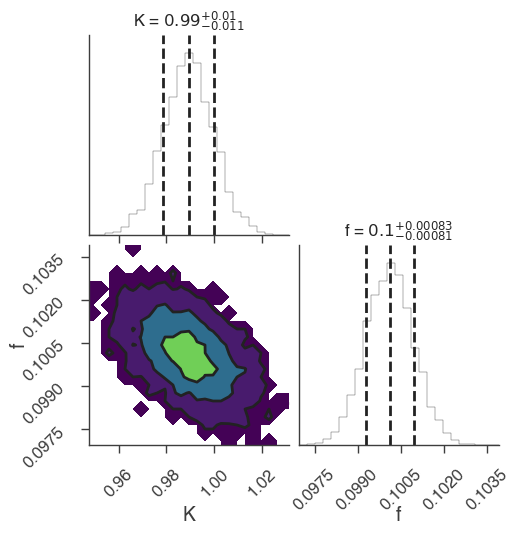

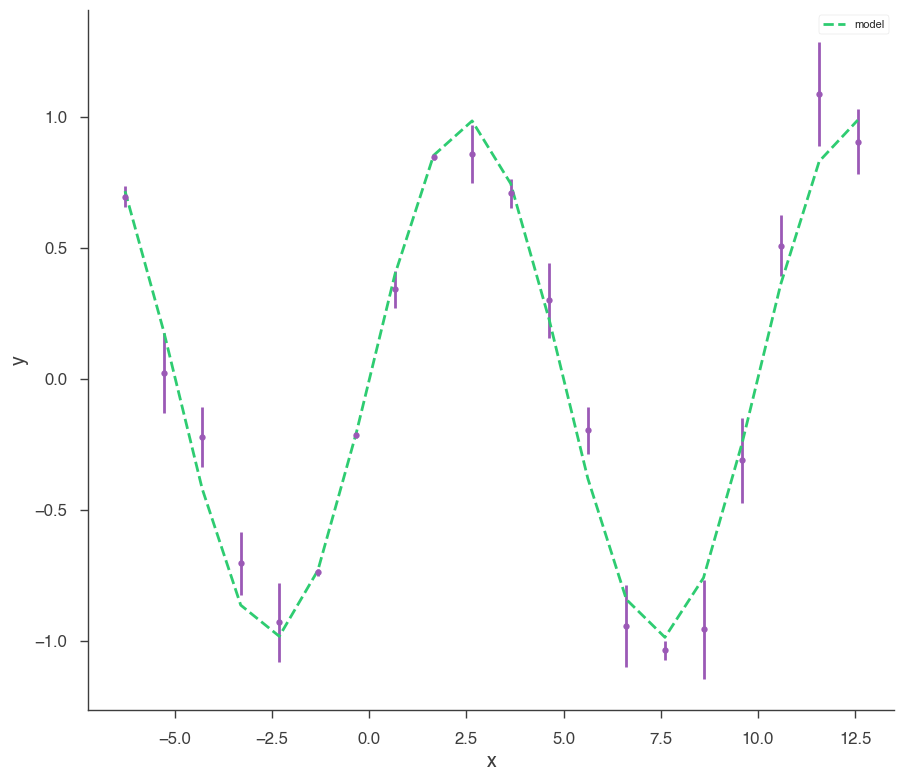

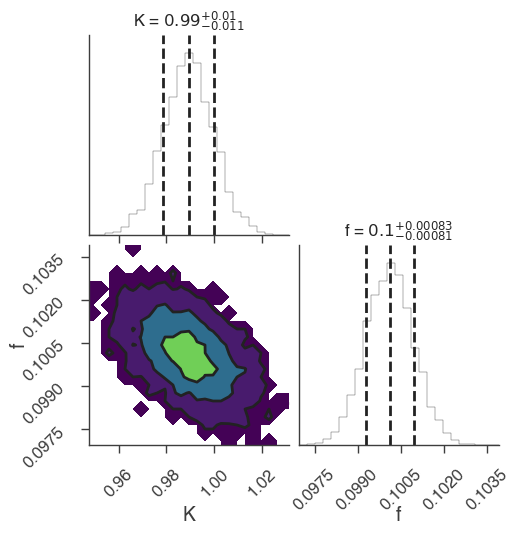

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

19:09:04 INFO      sampler set to zeus                                                     ]8;id=813061;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=434208;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 7/625 [00:00<00:09, 65.10it/s]

Sampling progress :   2%|▏         | 14/625 [00:00<00:09, 63.12it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:09, 63.90it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:08, 67.22it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:09, 64.93it/s]

Sampling progress :   7%|▋         | 43/625 [00:00<00:09, 62.82it/s]

Sampling progress :   8%|▊         | 51/625 [00:00<00:08, 66.80it/s]

Sampling progress :   9%|▉         | 58/625 [00:00<00:08, 64.59it/s]

Sampling progress :  10%|█         | 65/625 [00:00<00:08, 65.57it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:08, 67.46it/s]

Sampling progress :  13%|█▎        | 81/625 [00:01<00:07, 70.79it/s]

Sampling progress :  14%|█▍        | 89/625 [00:01<00:07, 72.84it/s]

Sampling progress :  16%|█▌        | 98/625 [00:01<00:06, 75.97it/s]

Sampling progress :  17%|█▋        | 106/625 [00:01<00:07, 72.82it/s]

Sampling progress :  18%|█▊        | 114/625 [00:01<00:07, 72.96it/s]

Sampling progress :  20%|█▉        | 122/625 [00:01<00:07, 71.37it/s]

Sampling progress :  21%|██        | 130/625 [00:01<00:07, 68.55it/s]

Sampling progress :  22%|██▏       | 137/625 [00:02<00:07, 67.55it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:07, 66.08it/s]

Sampling progress :  24%|██▍       | 151/625 [00:02<00:07, 64.57it/s]

Sampling progress :  25%|██▌       | 158/625 [00:02<00:07, 65.69it/s]

Sampling progress :  27%|██▋       | 166/625 [00:02<00:06, 68.10it/s]

Sampling progress :  28%|██▊       | 174/625 [00:02<00:06, 70.35it/s]

Sampling progress :  29%|██▉       | 183/625 [00:02<00:06, 73.31it/s]

Sampling progress :  31%|███       | 191/625 [00:02<00:05, 73.70it/s]

Sampling progress :  32%|███▏      | 199/625 [00:02<00:06, 70.24it/s]

Sampling progress :  33%|███▎      | 207/625 [00:02<00:05, 71.70it/s]

Sampling progress :  34%|███▍      | 215/625 [00:03<00:05, 73.39it/s]

Sampling progress :  36%|███▌      | 223/625 [00:03<00:05, 73.33it/s]

Sampling progress :  37%|███▋      | 231/625 [00:03<00:05, 70.77it/s]

Sampling progress :  38%|███▊      | 239/625 [00:03<00:05, 69.36it/s]

Sampling progress :  39%|███▉      | 246/625 [00:03<00:05, 69.01it/s]

Sampling progress :  41%|████      | 255/625 [00:03<00:05, 73.24it/s]

Sampling progress :  42%|████▏     | 263/625 [00:03<00:04, 73.02it/s]

Sampling progress :  43%|████▎     | 271/625 [00:03<00:04, 73.84it/s]

Sampling progress :  45%|████▍     | 279/625 [00:03<00:04, 72.38it/s]

Sampling progress :  46%|████▌     | 287/625 [00:04<00:04, 72.27it/s]

Sampling progress :  47%|████▋     | 296/625 [00:04<00:04, 74.89it/s]

Sampling progress :  49%|████▊     | 304/625 [00:04<00:04, 74.14it/s]

Sampling progress :  50%|████▉     | 312/625 [00:04<00:04, 73.88it/s]

Sampling progress :  51%|█████     | 320/625 [00:04<00:04, 73.98it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:04<00:04, 72.53it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:04<00:04, 70.03it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:04<00:04, 68.56it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:05<00:03, 68.79it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:05<00:03, 70.31it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:05<00:03, 73.50it/s]

Sampling progress :  60%|██████    | 376/625 [00:05<00:03, 73.41it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:05<00:03, 70.48it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:05<00:03, 65.71it/s]

Sampling progress :  64%|██████▍   | 400/625 [00:05<00:03, 67.35it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:05<00:03, 68.76it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:05<00:02, 71.11it/s]

Sampling progress :  68%|██████▊   | 424/625 [00:06<00:02, 71.76it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:06<00:02, 72.68it/s]

Sampling progress :  70%|███████   | 440/625 [00:06<00:02, 73.87it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:06<00:02, 73.19it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:06<00:02, 73.66it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:06<00:02, 76.46it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:06<00:02, 73.46it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:06<00:01, 73.17it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:06<00:01, 72.07it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:07<00:01, 72.22it/s]

Sampling progress :  81%|████████  | 505/625 [00:07<00:01, 73.25it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:07<00:01, 72.93it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:07<00:01, 70.83it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:07<00:01, 72.34it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:07<00:01, 73.43it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:07<00:01, 75.99it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:07<00:00, 76.78it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:07<00:00, 75.12it/s]

Sampling progress :  91%|█████████ | 570/625 [00:08<00:00, 72.38it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:08<00:00, 75.34it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:08<00:00, 73.73it/s]

Sampling progress :  95%|█████████▌| 596/625 [00:08<00:00, 75.73it/s]

Sampling progress :  97%|█████████▋| 604/625 [00:08<00:00, 75.24it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:08<00:00, 73.96it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:08<00:00, 73.99it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 71.30it/s]

19:09:13 INFO      fit restored to maximum of posterior                                         ]8;id=9372;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=777226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=714255;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=763529;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 14


Scale Factor: 1.057534


Mean Integrated Autocorrelation Time: 2.67


Effective Sample Size: 4673.27


Number of Log Probability Evaluations: 65949


Effective Samples per Log Probability Evaluation: 0.070862


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 +/- 0.10) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.990257
total,-10.990257


Values of statistical measures:

,statistical measures
AIC,26.686396
BIC,27.971978
DIC,25.984565
PDIC,2.001794


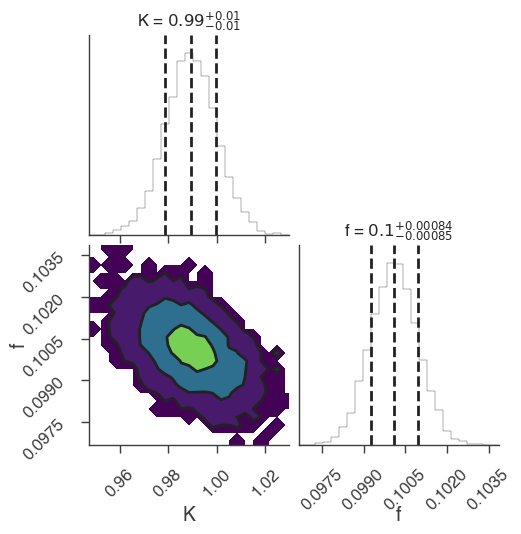

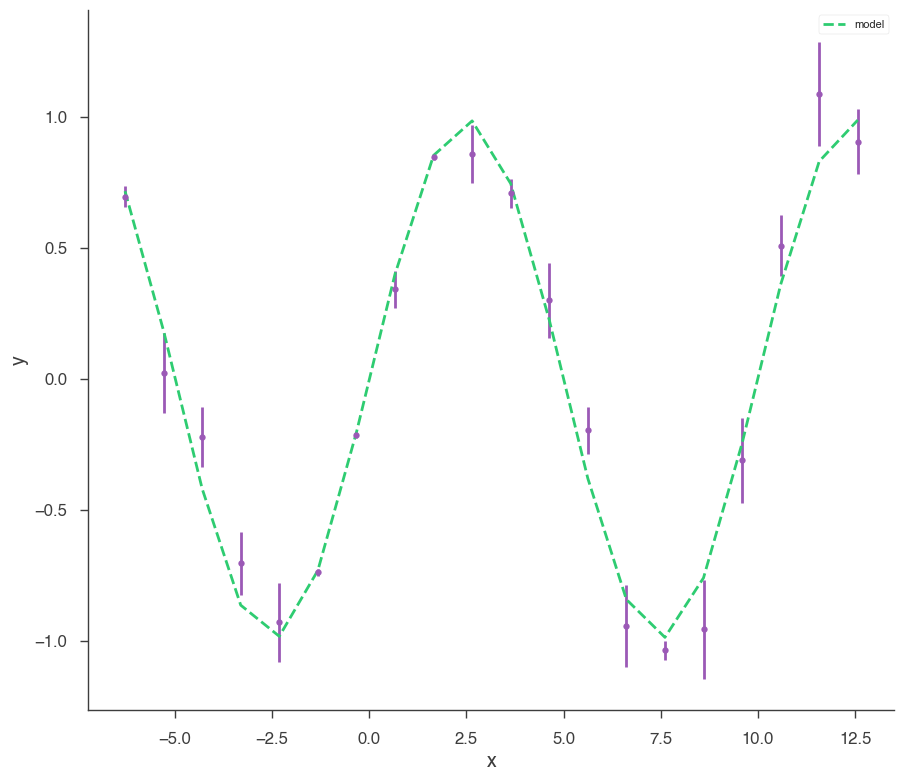

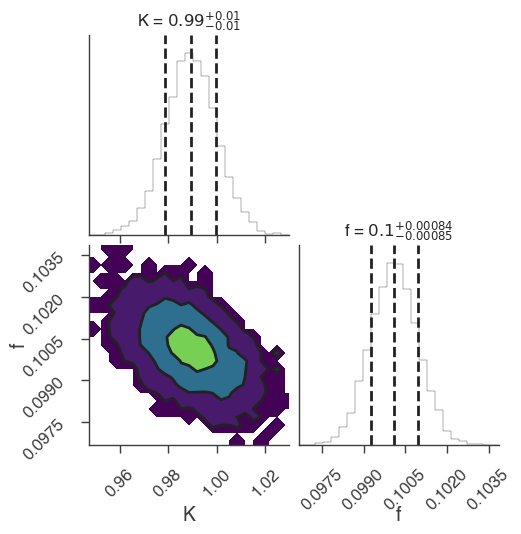

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

19:09:14 INFO      sampler set to ultranest                                                ]8;id=264403;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=125109;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 6502


[ultranest]   logZ = -20.26 +- 0.09543


[ultranest] Effective samples strategy satisfied (ESS = 972.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


19:09:21 INFO      fit restored to maximum of posterior                                         ]8;id=709848;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=570025;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=97016;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=490002;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 +/- 0.10) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.991275
total,-10.991275


Values of statistical measures:

,statistical measures
AIC,26.688432
BIC,27.974015
DIC,25.716682
PDIC,1.867866
log(Z),-8.798200


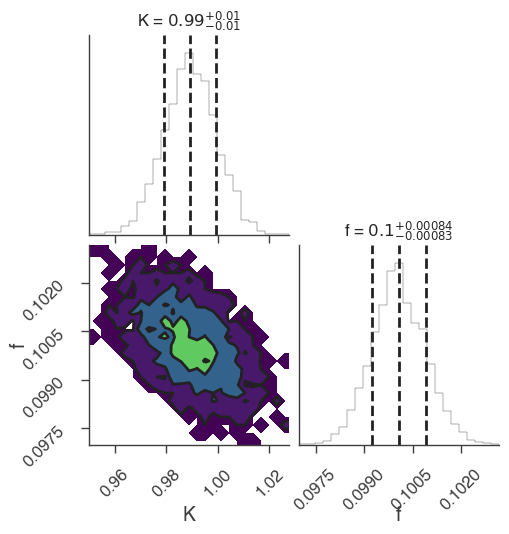

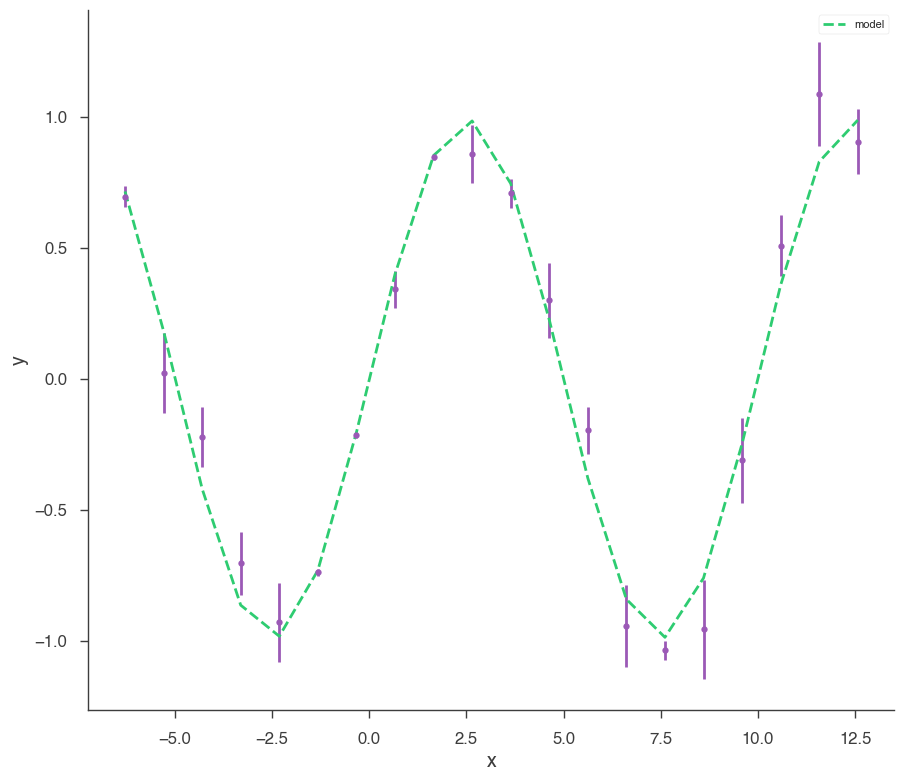

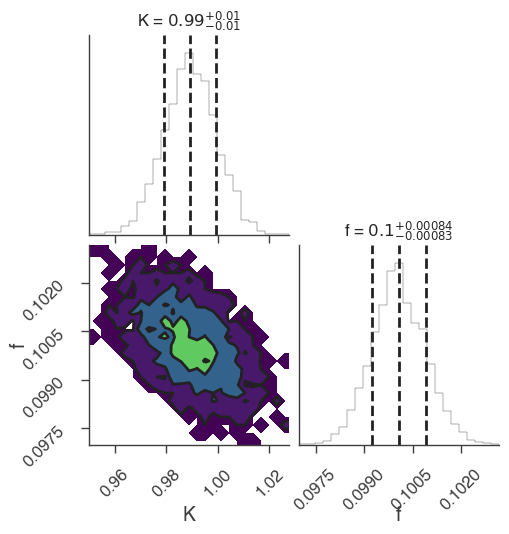

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()